In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

In [2]:
replicates = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Ft = '1.0'
t_diff = '10.0'
r_seed = '1.6'
output_path = '/home/miquel/ownCloud/crypt_patterning_simulation/data/Param_sweep_spatial_scales_zoomin_12-01-22/'

def pull_data(k_deg, p_ratio):
    df_morph = None
    df_angles = None
    df_dist = None

    k_deg_round = k_deg
    if k_deg == '0.070':
        k_deg_round = '0.07'
    if k_deg == '0.090':
        k_deg_round = '0.09'
    if k_deg == '0.110':
        k_deg_round = '0.11'

        
    p_ratio_round = p_ratio
    if p_ratio == '0.070':
        p_ratio_round = '0.07'
    if p_ratio == '0.090':
        p_ratio_round = '0.09'
    if p_ratio == '0.110':
        p_ratio_round = '0.11'

    for r in replicates:
        # crypt morphoglogy
        file_path_morph = output_path + 'output_imageJ/Resultscrypt_simulation_no_pattern_Ft_' \
        + Ft + '_t-diff_' + t_diff + '_r-seed_' + r_seed \
        + '_k-w-deg_' + k_deg + '_paneth-ratio_' + p_ratio \
        +'_rep_' + r + '_1_pix-size_1.0_hist.tif.txt'
        
        # angles
        file_path_angles = output_path + 'output_matlab_angles/crypt_simulation_no_pattern_Ft_' \
        + Ft + '_t-diff_' + t_diff + '_r-seed_' + r_seed \
        + '_kw_deg_' + k_deg_round + '_paneth_ratio_' + p_ratio_round \
        +'_rep_' + r + '_1_pix-size_1.0_matlab_angles.txt'

        # dist
        file_path_dist = output_path + 'output_matlab_distances/crypt_simulation_no_pattern_Ft_' \
        + Ft + '_t-diff_' + t_diff + '_r-seed_' + r_seed \
        + '_kw_deg_' + k_deg_round + '_paneth_ratio_' + p_ratio_round \
        +'_rep_' + r + '_1_pix-size_1.0_matlab_distances.txt'

        
        if(r == "0"):
            df_morph = pd.read_csv(file_path_morph,index_col=0,sep='\t',header=0)
            df_angles = pd.read_csv(file_path_angles,header=0)
            df_dist = pd.read_csv(file_path_dist,sep=' ',header=0)

        else:
            df_morph = pd.concat([df_morph, pd.read_csv(file_path_morph,index_col=0,sep='\t',header=0)])
            df_angles = pd.concat([df_angles, pd.read_csv(file_path_angles,header=0)])
            df_dist = pd.concat([df_dist, pd.read_csv(file_path_dist,sep=' ',header=0)])


    df_morph['shape-ratio'] = df_morph['Major']/df_morph['Minor']
    mean_crypt_area = df_morph['Area'].mean()
    mean_shape_ratio = df_morph['shape-ratio'].mean()
    
    df_angles = df_angles.dropna(axis=0,how='any')
    angles = df_angles.to_numpy()
    #print(np.mean(angles))
    if angles.shape[0]==0:
        angles = np.zeros(shape=1,dtype=float)
        
    #mean_crypt_area_bis = df_dist['crypt_Area'].mean()
    mean_crypt_diameter = df_dist['crypt_Diameter'].mean()
    mean_ad = df_dist['a_d'].mean()
    mean_bd = df_dist['b'].mean()

        
    return mean_crypt_area, mean_shape_ratio, angles, mean_crypt_diameter, mean_ad, mean_bd

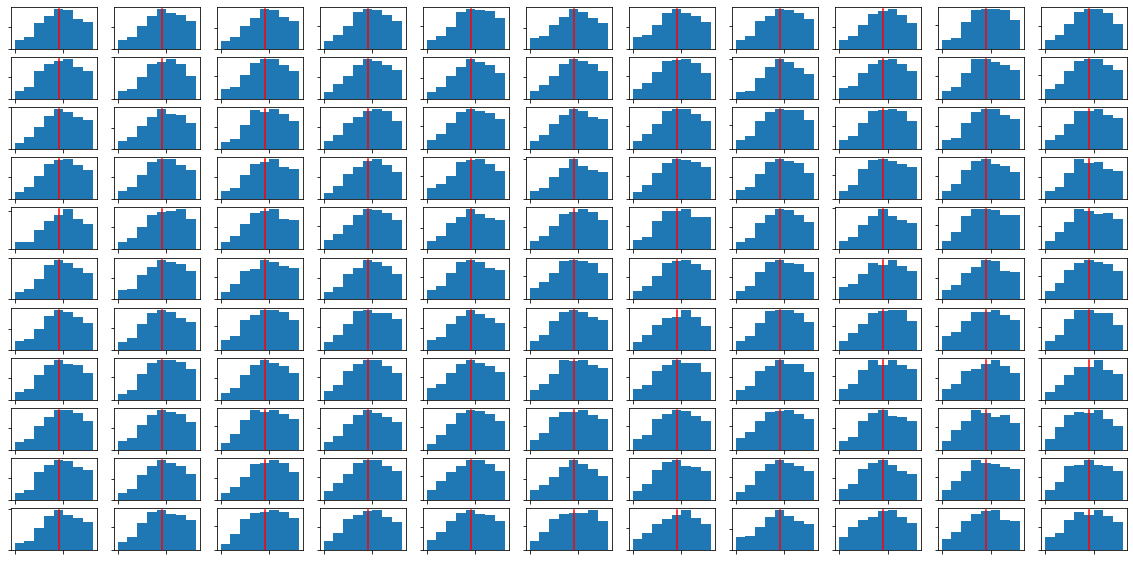

/tmp/ipykernel_25078/2801388984.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,j].set_xticklabels(param_kdeg)
/tmp/ipykernel_25078/2801388984.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,j].set_yticklabels(param_pratio)


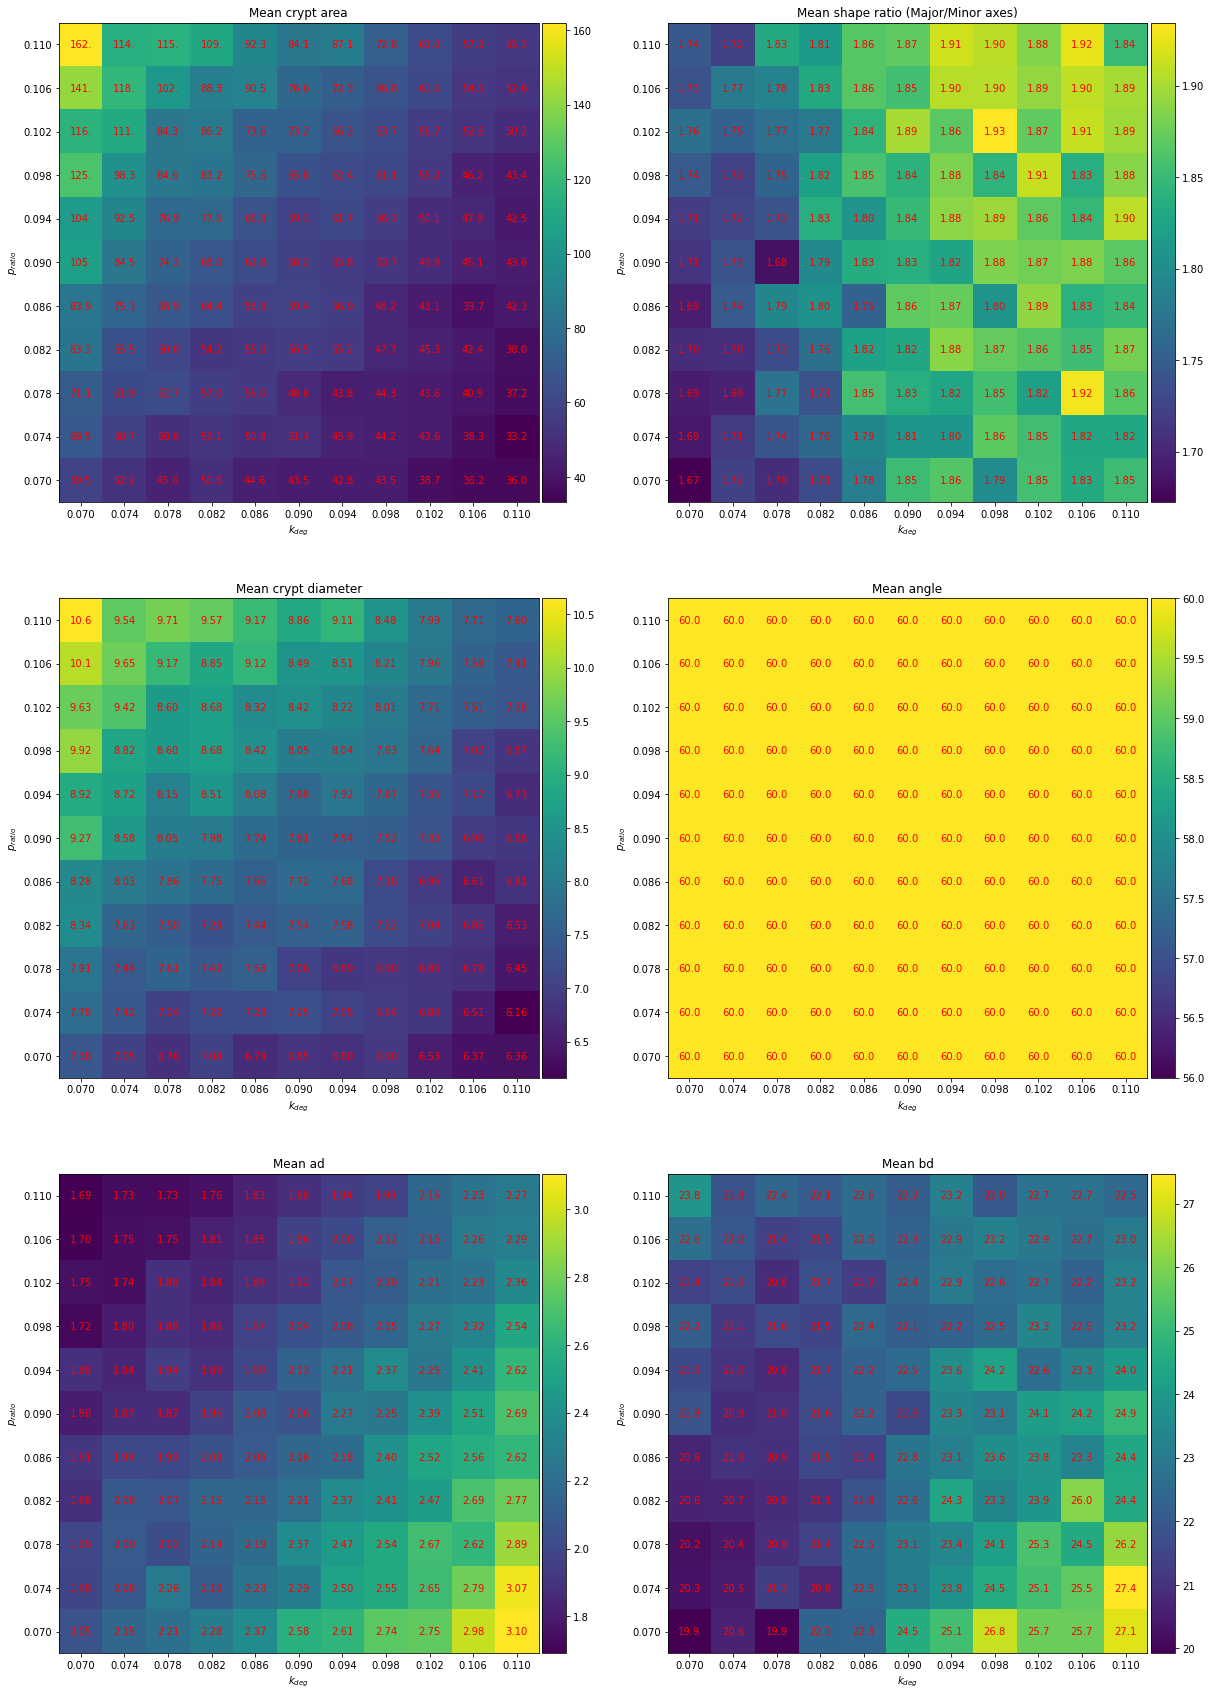

In [3]:
param_kdeg = ['0.070', '0.074', '0.078', '0.082', '0.086', '0.090', '0.094', '0.098', '0.102', '0.106', '0.110']
param_pratio = ['0.070', '0.074', '0.078', '0.082', '0.086', '0.090', '0.094', '0.098', '0.102', '0.106', '0.110']

n = len(param_kdeg)
m = len(param_pratio)

crypt_area_matrix = np.zeros(shape=(n,m),dtype=float)
shape_ratio_matrix = np.zeros(shape=(n,m),dtype=float)
diameter_matrix = np.zeros(shape=(n,m),dtype=float)
mean_angle_matrix = np.zeros(shape=(n,m),dtype=float)
ad_matrix = np.zeros(shape=(n,m),dtype=float)
bd_matrix = np.zeros(shape=(n,m),dtype=float)

fig_angles,axa=plt.subplots(n,m,figsize=(20,10))

bin_edges = np.arange(0,90,10)

for i, k_deg in enumerate(param_kdeg):
    for j, p_ratio in enumerate(param_pratio):
        crypt_area, shape_ratio, angles, crypt_diameter, ad, bd = pull_data(k_deg, p_ratio)
        #print("kdeg= ",k_deg," pratio= ",p_ratio,"// area= ",str(crypt_area)[:6]," area_bis= ",str(crypt_area_bis)[:6])
        crypt_area_matrix[i,j] = crypt_area
        shape_ratio_matrix[i,j] = shape_ratio
        diameter_matrix[i,j] = crypt_diameter
        #print(angles.shape)
        mean_angle_matrix[i,j] = np.mean(angles)
        ad_matrix[i,j] = ad
        bd_matrix[i,j] = bd
        
        #print(angles.shape)
        #print(angles)
        h=axa[m-1-j,i].hist(angles,bins=bin_edges,density=True)
        max_freq = np.amax(h[0])
        axa[m-1-j,i].plot([45,45],[0.0,max_freq],'-',c='r')
        axa[j,i].xaxis.set_tick_params(labelbottom=False)
        axa[j,i].yaxis.set_tick_params(labelleft=False)
            
        #plt.hist(angles,bins=bin_edges)
        #plt.show()
        
plt.show()


fig,ax=plt.subplots(3,2,figsize=(20,30))
h=ax[0,0].imshow(crypt_area_matrix.T, origin='lower',vmax=162)
divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)

h=ax[0,1].imshow(shape_ratio_matrix.T, origin='lower')
divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)

h=ax[1,0].imshow(diameter_matrix.T, origin='lower')
divider = make_axes_locatable(ax[1,0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)

h=ax[1,1].imshow(mean_angle_matrix.T, origin='lower',vmin=56)
divider = make_axes_locatable(ax[1,1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)

h=ax[2,0].imshow(ad_matrix.T, origin='lower')
divider = make_axes_locatable(ax[2,0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)

h=ax[2,1].imshow(bd_matrix.T, origin='lower')
divider = make_axes_locatable(ax[2,1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)

for j in range(m):
    for i in range(n):
        text = ax[0,0].text(i, j, str(crypt_area_matrix[i,j])[:4], ha="center", va="center", color="red")
        text = ax[0,1].text(i, j, str(shape_ratio_matrix[i,j])[:4], ha="center", va="center", color="red")
        text = ax[1,0].text(i, j, str(diameter_matrix[i,j])[:4], ha="center", va="center", color="red")
        text = ax[1,1].text(i, j, str(mean_angle_matrix[i,j])[:4], ha="center", va="center", color="red")
        text = ax[2,0].text(i, j, str(ad_matrix[i,j])[:4], ha="center", va="center", color="red")
        text = ax[2,1].text(i, j, str(bd_matrix[i,j])[:4], ha="center", va="center", color="red")

        
ax[0,0].set_title("Mean crypt area")
ax[0,1].set_title("Mean shape ratio (Major/Minor axes)")
ax[1,0].set_title("Mean crypt diameter")
ax[1,1].set_title("Mean angle")
ax[2,0].set_title("Mean ad")
ax[2,1].set_title("Mean bd")

for i in range(3):
    for j in range(2):
        ax[i,j].set_xlabel("$k_{deg}$")
        ax[i,j].set_ylabel("$p_{ratio}$")
        ax[i,j].set_xticklabels(param_kdeg)
        ax[i,j].set_yticklabels(param_pratio)
        ax[i,j].set_xticks(range(len(param_kdeg)))
        ax[i,j].set_yticks(range(len(param_pratio)))

plt.show()


In [11]:
replicates = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Ft = '1.0'
t_diff = '10.0'
r_seed = '1.6'
output_path = '/home/miquel/ownCloud/crypt_patterning_simulation/data/Param_sweep_spatial_scales_zoomin_12-01-22/'

def pull_distributions(k_deg, p_ratio):
    df_dist = None

    k_deg_round = k_deg
    if k_deg == '0.070':
        k_deg_round = '0.07'
    if k_deg == '0.090':
        k_deg_round = '0.09'
    if k_deg == '0.110':
        k_deg_round = '0.11'

        
    p_ratio_round = p_ratio
    if p_ratio == '0.070':
        p_ratio_round = '0.07'
    if p_ratio == '0.090':
        p_ratio_round = '0.09'
    if p_ratio == '0.110':
        p_ratio_round = '0.11'


    for r in replicates:
        # dist
        file_path_dist = output_path + 'output_matlab_distances/crypt_simulation_no_pattern_Ft_' \
        + Ft + '_t-diff_' + t_diff + '_r-seed_' + r_seed \
        + '_kw_deg_' + k_deg_round + '_paneth_ratio_' + p_ratio_round \
        +'_rep_' + r + '_1_pix-size_1.0_matlab_distances.txt'

        
        if(r == "0"):
            df_dist = pd.read_csv(file_path_dist,sep=' ',header=0)

        else:
            df_dist = pd.concat([df_dist, pd.read_csv(file_path_dist,sep=' ',header=0)])


    mean_crypt_area_bis = df_dist['crypt_Area'].mean()
    mean_crypt_diameter = df_dist['crypt_Diameter'].mean()
    mean_ad = df_dist['a_d'].mean()
    mean_bd = df_dist['b_d'].mean()

        
    return df_dist['crypt_Area'].to_numpy(), df_dist['a_d'].to_numpy(), df_dist['b_d'].to_numpy()

/tmp/ipykernel_24843/856070716.py:137: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(param_kdeg)
/tmp/ipykernel_24843/856070716.py:138: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(param_pratio)


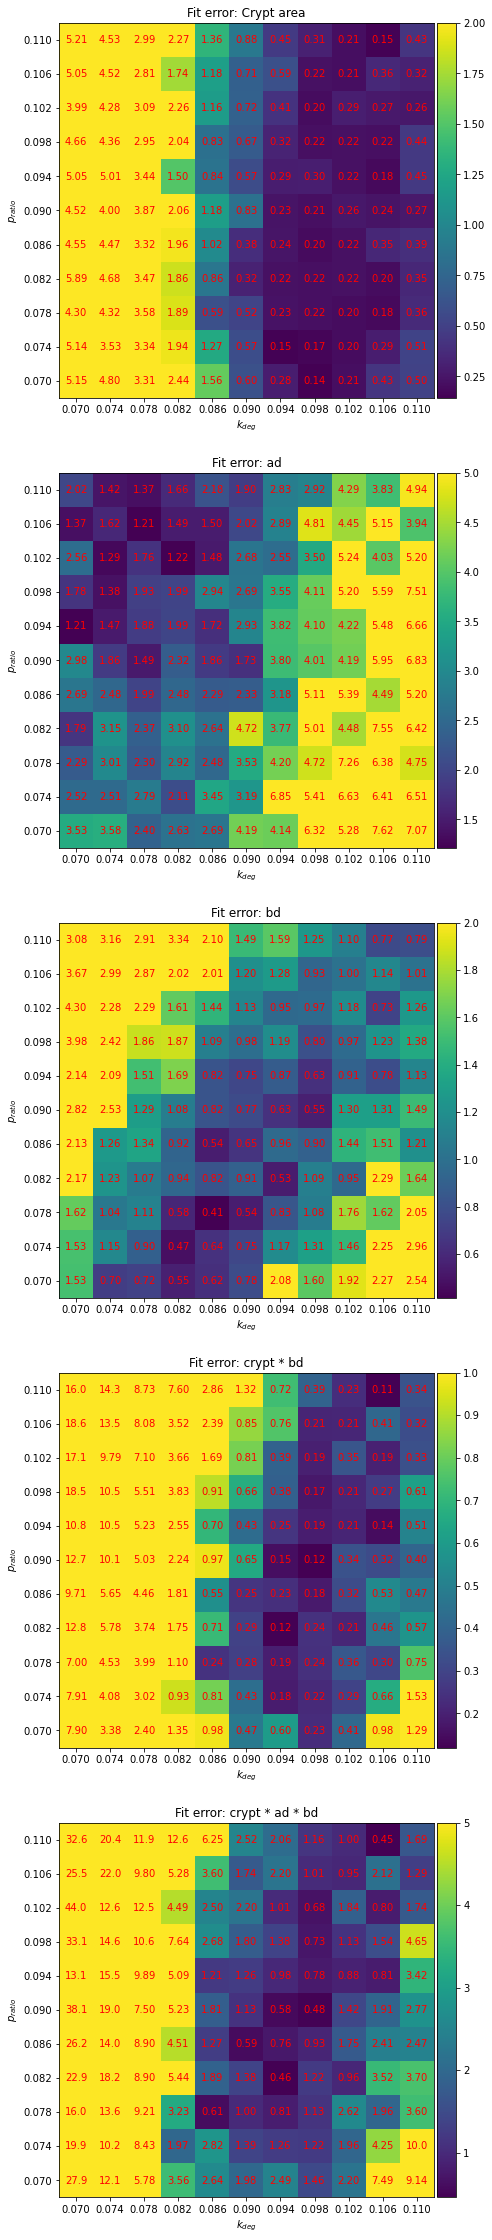

In [22]:
# Comparing distributions of crypt areas and distances
exp_path = "/home/miquel/ownCloud/crypt_patterning_simulation/data/experimental_measures.csv"
df_exp = pd.read_csv(exp_path,sep=',',header=0)

#k_deg='0.09'
#p_ratio='0.08'
param_kdeg = ['0.070', '0.074', '0.078', '0.082', '0.086', '0.090', '0.094', '0.098', '0.102', '0.106', '0.110']
param_pratio = ['0.070', '0.074', '0.078', '0.082', '0.086', '0.090', '0.094', '0.098', '0.102', '0.106', '0.110']

n = len(param_kdeg)
m = len(param_pratio)

crypt_area_error = np.zeros(shape=(n,m),dtype=float)
ad_error = np.zeros(shape=(n,m),dtype=float)
bd_error = np.zeros(shape=(n,m),dtype=float)

exp_max_area = np.amax(df_exp['Norm. Area'])

for i, k_deg in enumerate(param_kdeg):
    for j, p_ratio in enumerate(param_pratio):

        crypt_area, a_d, b_d = pull_distributions(k_deg, p_ratio)
        #bins = np.arange(0,225,12.5)
        #max_area = np.amax(crypt_area)
        #bins = np.arange(0,np.amax([exp_max_area,max_area]),20)
        bins = np.arange(0,np.amax(exp_max_area),20)
        if (k_deg=='0.08')&(p_ratio=='0.08'):
            print("kdeg=",k_deg,"pratio=",p_ratio)
            plt.title("norm. crypt area")
            plt.hist(df_exp['Norm. Area'],bins=bins,density=True,alpha=0.7,label='exp')
            plt.hist(crypt_area,bins=bins,density=True,alpha=0.7,label='sim')
            plt.legend()
            plt.show()
            
        h_exp = np.histogram(df_exp['Norm. Area'],bins=bins,density=True)[0]
        h_sim = np.histogram(crypt_area,bins=bins,density=True)[0]
        #print(h_exp)
        #print(h_sim)
        if np.isnan(h_sim[0]):
            h_sim = np.ones(shape=h_sim.shape)
        
        err = 10000*np.sum((h_exp-h_sim)**2)
        #print("kdeg=",k_deg,"pratio=",p_ratio,"err=",err)

        crypt_area_error[i,j] = err



        bins = np.arange(1,6,0.4)
        if (k_deg=='0.08')&(p_ratio=='0.08'):
            print("kdeg=",k_deg,"pratio=",p_ratio)
            plt.title("a_d")
            plt.hist(df_exp['a_d'],bins=bins,density=True,alpha=0.7,label='exp')
            plt.hist(a_d,bins=bins,density=True,alpha=0.7,label='sim')
            plt.legend()
            plt.show()

        h_exp = np.histogram(df_exp['a_d'],bins=bins,density=True)[0]
        h_sim = np.histogram(a_d,bins=bins,density=True)[0]
        #print(h_exp)
        #print(h_sim)
        if np.isnan(h_sim[0]):
            h_sim = np.ones(shape=h_sim.shape)
        
        err = 10*np.sum((h_exp-h_sim)**2)
        #print("kdeg=",k_deg,"pratio=",p_ratio,"ad err=",err)

        ad_error[i,j] = err

        
        bins = np.arange(1,6,0.5)
        if (k_deg=='0.08')&(p_ratio=='0.08') :
            print("kdeg=",k_deg,"pratio=",p_ratio)
            plt.title("b_d")
            plt.hist(df_exp['b_d'],bins=bins,density=True,alpha=0.7,label='exp')
            plt.hist(b_d,bins=bins,density=True,alpha=0.7,label='sim')
            plt.legend()
            plt.show()
        
        h_exp = np.histogram(df_exp['b_d'],bins=bins,density=True)[0]
        h_sim = np.histogram(b_d,bins=bins,density=True)[0]
        #print(h_exp)
        #print(h_sim)
        if np.isnan(h_sim[0]):
            h_sim = np.ones(shape=h_sim.shape)
        
        err = 10*np.sum((h_exp-h_sim)**2)
        #print("kdeg=",k_deg,"pratio=",p_ratio,"bd err=",err)

        bd_error[i,j] = err
        
        
fig,ax=plt.subplots(5,1,figsize=(20,40))
h=ax[0].imshow(crypt_area_error.T, origin='lower',vmax=2)
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)

h=ax[1].imshow(ad_error.T, origin='lower',vmax=5)
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)

h=ax[2].imshow(bd_error.T, origin='lower',vmax=2)
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)


h=ax[3].imshow(crypt_area_error.T*bd_error.T, origin='lower',vmax=1)
divider = make_axes_locatable(ax[3])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)
h=ax[4].imshow(crypt_area_error.T*ad_error.T*bd_error.T, origin='lower',vmax=5)
divider = make_axes_locatable(ax[4])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)

for j in range(m):
    for i in range(n):
        text = ax[0].text(i, j, str(crypt_area_error[i,j])[:4], ha="center", va="center", color="red")
        text = ax[1].text(i, j, str(ad_error[i,j])[:4], ha="center", va="center", color="red")
        text = ax[2].text(i, j, str(bd_error[i,j])[:4], ha="center", va="center", color="red")
        text = ax[3].text(i, j, str(crypt_area_error[i,j]*bd_error[i,j])[:4], ha="center", va="center", color="red")
        text = ax[4].text(i, j, str(crypt_area_error[i,j]*ad_error[i,j]*bd_error[i,j])[:4], ha="center", va="center", color="red")

        
ax[0].set_title("Fit error: Crypt area")
ax[1].set_title("Fit error: ad")
ax[2].set_title("Fit error: bd")
ax[3].set_title("Fit error: crypt * bd")
ax[4].set_title("Fit error: crypt * ad * bd")

for i in range(5):
    ax[i].set_xlabel("$k_{deg}$")
    ax[i].set_ylabel("$p_{ratio}$")
    ax[i].set_xticklabels(param_kdeg)
    ax[i].set_yticklabels(param_pratio)
    ax[i].set_xticks(range(len(param_kdeg)))
    ax[i].set_yticks(range(len(param_pratio)))

plt.show()
